In [1]:
from ga_Develop_I import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tabulate import tabulate
# from mpl_toolkits.mplot3d import Axes3D

import sys
sys.path.append('/Users/poramat/Documents/qwanta/tutorial/poramat_work_part')
from all_function import *

In [2]:
# Global parameter

elitism = 0.3
population_size = 5
mutation_rate = 0.8
mutation_sigma = 0.1
mutation_decay = 0.999
mutation_limit = 0.01
amount_optimisation_steps = 250
dna_bounds = (0, 1)
dna_start_position = [0, 0]

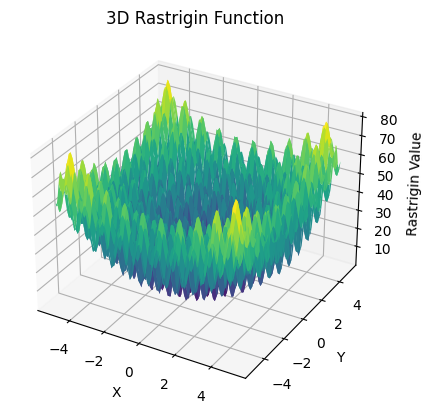

Input (x): -2.173312578607114
Input (y): -0.7959760436670411
Rastrigin Value: 17.87399964834583


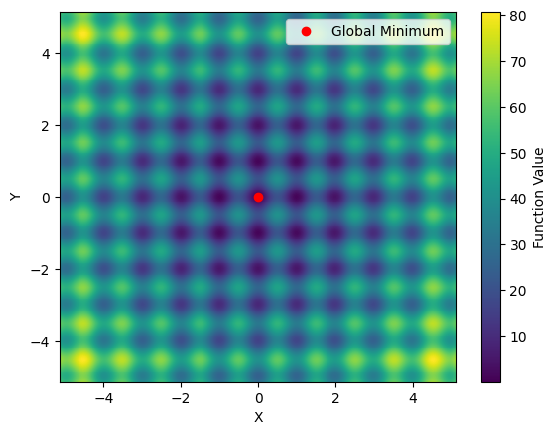

In [3]:
def rastrigin(x, y):
    A = 10
    sum_term = x**2 - A * np.cos(2 * np.pi * x) + y**2 - A * np.cos(2 * np.pi * y)
    return A * 2 + sum_term

x = np.linspace(-5.12, 5.12, 100)
y = np.linspace(-5.12, 5.12, 100)
x, y = np.meshgrid(x, y)
z = rastrigin(x, y)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Rastrigin Value')
ax.set_title('3D Rastrigin Function')

# Show the plot
plt.show()

# Generate random input values
x_input = np.random.uniform(-5.12, 5.12)
y_input = np.random.uniform(-5.12, 5.12)

# Calculate Rastrigin function output
output = rastrigin(x_input, y_input)

# Print the input values and the corresponding output
print(f"Input (x): {x_input}")
print(f"Input (y): {y_input}")
print(f"Rastrigin Value: {output}")

x = np.linspace(-5.12, 5.12, 400)
y = np.linspace(-5.12, 5.12, 400)
X, Y = np.meshgrid(x, y)
Z = rastrigin(X, Y)

plt.pcolormesh(X, Y, Z, cmap='viridis')
plt.colorbar(label='Function Value')

plt.plot(0, 0, 'ro', label='Global Minimum')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()



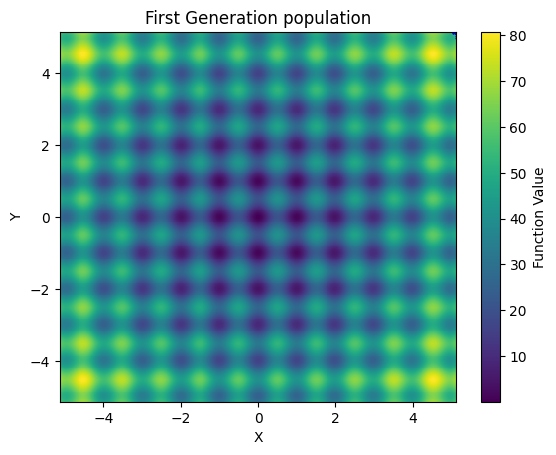

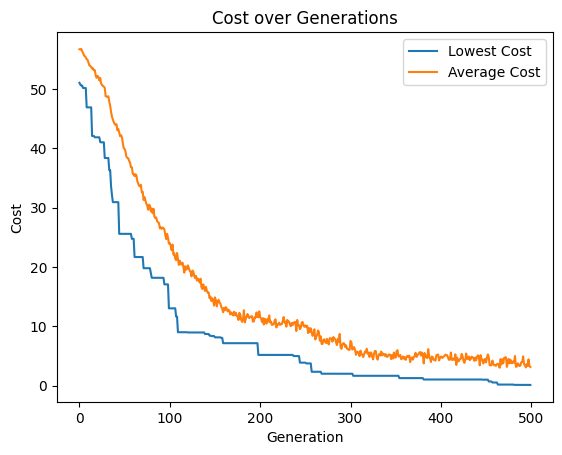

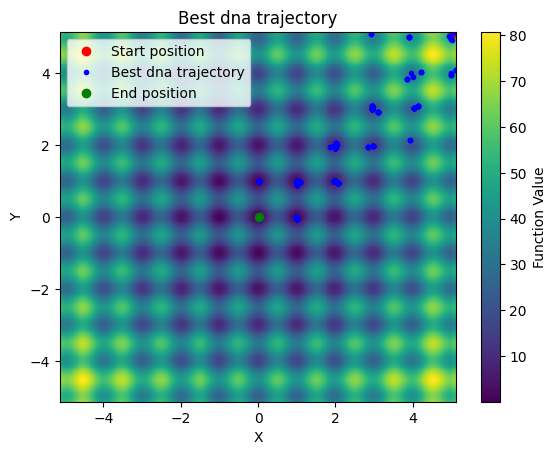

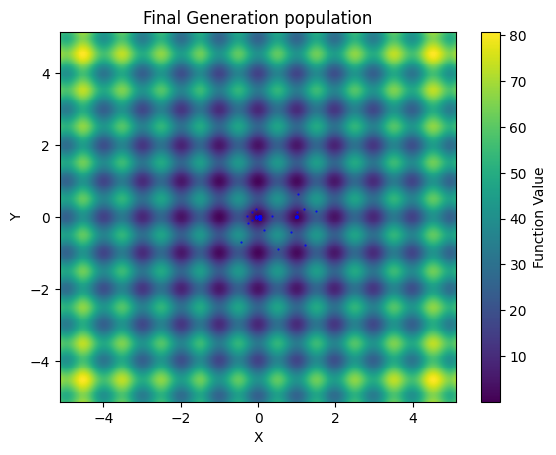

In [8]:
elitism = 0.2
population_size = 100
mutation_rate = 0.8
mutation_sigma = 0.3
mutation_decay = 0.999
mutation_limit = 0.01
amount_optimisation_steps = 500
dna_bounds = (-5.11, 5.11)
dna_start_position = [4.8, 4.8]

ga_validate = GA_Develop_I(
    dna_size=len(dna_start_position),
    dna_bounds=dna_bounds,
    dna_start_position=dna_start_position,
    elitism=elitism,
    population_size=population_size,
    mutation_rate=mutation_rate,
    mutation_sigma=mutation_sigma,
    mutation_decay=mutation_decay,
    mutation_limit=mutation_limit,
)

first_generation_pop = ga_validate.population

x_first = [first_generation_pop[i][0] for i in range(len(first_generation_pop))]
y_first = [first_generation_pop[i][1] for i in range(len(first_generation_pop))]

x = np.linspace(-5.12, 5.12, 400)
y = np.linspace(-5.12, 5.12, 400)
X, Y = np.meshgrid(x, y)
Z = rastrigin(X, Y)

plt.pcolormesh(X, Y, Z, cmap='viridis')
plt.colorbar(label='Function Value')

plt.plot(x_first, y_first, '.b', markersize=1)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('First Generation population')
plt.show()


x = [ga_validate.population[i][0] for i in range(ga_validate.population_size)]
y = [ga_validate.population[i][1] for i in range(ga_validate.population_size)]

cost_array = np.array([rastrigin(x[i], x[i]) for i in range(ga_validate.population_size)])
dna_trajectory = []

assert len(cost_array) == ga_validate.population_size

for step in range(amount_optimisation_steps):
    best_dna, lowest_cost = ga_validate.evolve(cost_array)
    dna_trajectory.append(best_dna)

    x_new = [ga_validate.population[i][0] for i in range(ga_validate.population_size)]
    y_new = [ga_validate.population[i][1] for i in range(ga_validate.population_size)]    
    
    cost_array = np.array([rastrigin(x_new[i], y_new[i]) for i in range(ga_validate.population_size)])

    assert len(cost_array) == ga_validate.population_size

    if step % 10 == 0:
        # print("Step: %d, Lowest cost: %f" % (step, lowest_cost))
        # print("Best DNA:", best_dna)
        pass

    if step+1 == amount_optimisation_steps:
        ga_validate.plot()

        x_data = [dna_trajectory[i][0] for i in range(len(dna_trajectory))]
        y_data = [dna_trajectory[i][1] for i in range(len(dna_trajectory))]

        x = np.linspace(-5.12, 5.12, 400)
        y = np.linspace(-5.12, 5.12, 400)
        X, Y = np.meshgrid(x, y)
        Z = rastrigin(X, Y)

        plt.pcolormesh(X, Y, Z, cmap='viridis')
        plt.colorbar(label='Function Value')

        # plt.plot(0, 0, 'ro', label='Global Minimum')
        plt.plot(x_data[0], y_data[0], 'ro', label='Start position')
        plt.plot(x_data, y_data, '.b', label='Best dna trajectory')
        plt.plot(x_data[-1], y_data[-1], 'go', label='End position')

        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Best dna trajectory')
        plt.legend()
        plt.show()

final_generation_pop = ga_validate.population

x_final = [final_generation_pop[i][0] for i in range(len(final_generation_pop))]
y_final = [final_generation_pop[i][1] for i in range(len(final_generation_pop))]

x = np.linspace(-5.12, 5.12, 400)
y = np.linspace(-5.12, 5.12, 400)
X, Y = np.meshgrid(x, y)
Z = rastrigin(X, Y)

plt.pcolormesh(X, Y, Z, cmap='viridis')
plt.colorbar(label='Function Value')

plt.plot(x_final, y_final, '.b', markersize=1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Final Generation population')
plt.show()

        
        

In [21]:
ga = GA_Develop_I(
    dna_size=len(dna_start_position),
    dna_bounds=dna_bounds,
    dna_start_position=dna_start_position,
    elitism=elitism,
    population_size=population_size,
    mutation_rate=mutation_rate,
    mutation_sigma=mutation_sigma,
    mutation_decay=mutation_decay,
    mutation_limit=mutation_limit,
)

ga.population

array([[0.4958918 , 0.47707336],
       [0.38547597, 0.42417846],
       [0.43255133, 0.42173891],
       [0.395897  , 0.84936071],
       [0.31641726, 0.42674973]])

In [30]:
opt_data = [
    [ga.population[i][0], ga.population[i][1]] for i in range(ga.population_size)
]

opt_data

[[0.49589179714542425, 0.4770733585065068],
 [0.38547596573694853, 0.42417845902833123],
 [0.432551331534084, 0.4217389147153394],
 [0.3958970006265288, 0.8493607117293009],
 [0.31641725941469356, 0.4267497331971886]]

In [17]:
# 1 = good, 0 = worst

print(parameterTransform(1,1,1,1))
print(parameterTransform(0,0,0,0))

(0.0, 1, 0.0, 0.0)
(0.01, 0, 0.03, 0.1)


In [19]:
test = [list(parameterTransform(fake_1[i], fake_2[i], fake_3[i], fake_4[i])) for i in range(len(fake_1))]
df = pd.DataFrame(test, columns = ['photon_loss', 'coherence', 'gate_error', 'measurement_error'])
df

,photon_loss,coherence,gate_error,measurement_error
0,0.002867,0.869387,0.026100,0.059503
1,0.005069,0.050614,0.020630,0.095593
2,0.004834,0.304308,0.005985,0.097683
3,0.005940,0.230141,0.008124,0.047129
4,0.005084,0.373501,0.013998,0.040270
5,0.000119,0.693334,0.011591,0.081414


In [21]:
p1 = [baseline_value[i][0] for i in range(3)]
p2 = [baseline_value[i][1] for i in range(3)]
p3 = [baseline_value[i][2] for i in range(3)]
p4 = [baseline_value[i][3] for i in range(3)]

print(p1)
print(p2)
print(p3)
print(p4)

[0.9567205559149616, 0.5533560910292152, 0.8288674335762818]
[0.39170611067965, 0.38703706642040836, 0.41890470259357404]
[0.3571097672854786, 0.9979322300303388, 0.895401310397978]
[0.8398114023523553, 0.9357270928042676, 0.2219390258175057]


In [22]:
optimize_data = [list(parameterTransform(p1[i], p2[i], p3[i], p4[i])) for i in range(3)]
optimize_data

[[0.0004327944408503842,
  0.39170611067965,
  0.019286706981435642,
  0.01601885976476447],
 [0.004466439089707848,
  0.38703706642040836,
  6.203309908983656e-05,
  0.0064272907195732365],
 [0.0017113256642371823,
  0.41890470259357404,
  0.003137960688060659,
  0.07780609741824944]]

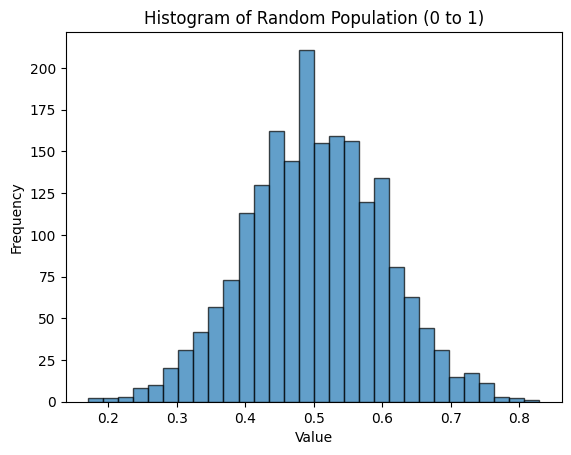

In [33]:
def __create_random_population(
        dna_size=4, 
        dna_sigma=0.3, 
        population_size=500):
    population = np.random.standard_normal((population_size, dna_size)) * dna_sigma
    population = 0.5 + 0.2 * (population / (2 * dna_sigma))
    return population

# Generate the population
population = __create_random_population()

# Flatten the population to a 1D array
flattened_population = population.flatten()

# Plot the histogram
plt.hist(flattened_population, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Random Population (0 to 1)')
plt.show()


In [35]:
def singleObject_cost(baseParameter, simParameter, w1, w2, objectFidelity, simFidelity):
    # cost function
    output = []
    for i in range(len(baseParameter)):
        k = np.log(baseParameter[i])/np.log(simParameter[i])
        output.append(k)

    cost = sum(output)

    cost_single_objective = w1*Heaviside(objectFidelity - simFidelity) + w2*cost

    return cost_single_objective

singleObject_cost(
    baseParameter = [0.52489565, 0.52846399, 0.58328389, 0.69194954],
    simParameter = [0.5248956538075089, 0.528463991589942, 0.583283886636237, 0.691949539320875],
    w1 = 0.5,
    w2 = 0.5,
    objectFidelity = 0.7,
    simFidelity = 0.7431666666666666
)

2.0000000013041666

In [6]:
fidelity = [[np.random.rand() for i in range(4)] for j in range(3)] # 3 individual, 4 stregies
fidelity

[[0.40786823836454855,
  0.06644124915719818,
  0.9329658206136872,
  0.5720194427219881],
 [0.1490882437802109,
  0.4113701533784614,
  0.5263226990626779,
  0.6021547610432578],
 [0.7839418468125882,
  0.2974135086545937,
  0.46973529627789246,
  0.901054368003931]]

In [7]:
np.mean(fidelity, axis=0)

array([0.44696611, 0.2584083 , 0.64300794, 0.69174286])

In [8]:
np.max(fidelity, axis=0)

array([0.78394185, 0.41137015, 0.93296582, 0.90105437])

In [9]:
np.min(fidelity, axis=0)

array([0.14908824, 0.06644125, 0.4697353 , 0.57201944])

In [12]:
def test_func():
    return np.random.rand(), np.random.rand()

dum = [test_func() for i in range(3)]
print(dum)
dum[1][0]

[(0.6808101309039382, 0.6651360711635441), (0.9785473857951172, 0.028369269539596287), (0.47172474754754967, 0.41710562015604047)]


0.9785473857951172

In [16]:
# Original dictionary
my_dict = {'a': 1, 'b': 2}

# Dictionary with new key-value pairs to be added
new_data = {'c': 3, 'd': 4}

# Using the update() method to add new_data to my_dict
my_dict.update(new_data)

print(my_dict)


{'a': 1, 'b': 2, 'c': 3, 'd': 4}
